# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.9.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

185

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Holy See', 'Fiji', 'Tanzania'],
 5: ['Brunei', 'Myanmar', 'Grenada', 'Georgia', 'Slovakia', 'Tunisia',
     'Hungary'],
 6: ['Jordan', 'Ireland', 'Yemen', 'Liechtenstein', 'Andorra', 'Czech Republic',
     'Slovenia', 'Papua New Guinea', 'Belize', 'Cambodia'],
 7: ['Uganda', 'Burundi', 'Cyprus', 'Niger', 'Saint Vincent and the Grenadines',
     'Malawi', 'Colombia', 'Zimbabwe', 'South Sudan', 'Dominica',
     'Central African Republic', 'Antigua and Barbuda', 'Lesotho',
     'Equatorial Guinea', 'Mongolia', 'Jamaica', 'Angola', 'Spain',
     'Kazakhstan', 'Libya', 'Seychelles', 'Trinidad and Tobago', 'Gambia',
     'Sao Tome and Principe', 'Lithuania', 'Montenegro'],
 8: ['Vietnam', 'Monaco', 'Botswana', 'Djibouti', 'Croatia', 'Lebanon',
     'Cameroon', 'Kyrgyzstan', 'Poland', 'Paraguay', 'Thailand', 'Nicaragua',
     'Ukraine', 'Malta', 'Saint Lucia', 'Mauritius', 'San Marino', 'Guyana',
     'Namibia', 'Austria', 'Guinea-Bissau', 'Iceland', 'Luxembourg', 'Zambia',
     'Comoro

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

20

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{12: ['Mali', 'Kuwait', 'Algeria', 'Bolivia', 'Iran', 'Bahrain',
      'Dominican Republic', 'Armenia', 'Iraq', 'Mexico', 'United States',
      'Italy', 'Nigeria', 'United Arab Emirates', 'Turkey', 'Egypt', 'Brazil',
      'France', 'Peru'],
 13: ['Russia']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  07May2020   330457362
        1st    Past  08May2020  19May2020   330457362
        2nd    Past  20May2020  30May2020   330457362
        3rd    Past  31May2020  12Jun2020   330457362
        4th    Past  13Jun2020  26Jun2020   330457362
        5th    Past  27Jun2020  10Jul2020   330457362
        6th    Past  11Jul2020  24Jul2020   330457362
        7th    Past  25Jul2020  10Aug2020   330457362
        8th    Past  11Aug2020  28Aug2020   330457362
        9th    Past  29Aug2020  18Sep2020   330457362
        10th   Past  19Sep2020  03Oct2020   330457362
        11th   Past  04Oct2020  14Oct2020   330457362
        12th   Past  15Oct2020  23Oct2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DZA,  6th phase (28Jul2020 - 04Aug2020): finished  178 trials in 0 min  5 sec

	BRA,  9th phase (31Aug2020 - 10Sep2020): finished  166 trials in 0 min  5 sec

	MLI,  7th phase (25Jun2020 - 02Jul2020): finished  807 trials in 0 min 30 sec

	FRA,  4th phase (26Apr2020 - 26May2020): finished 1352 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1341 trials in 1 min  0 sec

	PER,  3rd phase (19Jun2020 - 10Jul2020): finished 1369 trials in 1 min  0 sec

	BHR, 10th phase (24Sep2020 - 05Oct2020): finished  448 trials in 0 min 15 sec

	IRN,  1st phase (31Mar2020 - 05May2020): finished 1402 trials in 1 min  0 sec

	DZA, 10th phase (06Sep2020 - 24Sep2020): finished  613 trials in 0 min 20 sec

	RUS,  3rd phase (31May2020 - 12Jun2020): finished 1520 trials in 1 min  0 sec

	EGY,  3rd phase (05Jun2020 - 18Jun2020): finished 1509 trials in 1 min  0 sec

	EGY,  6th phase (09Jul2020 - 20Jul2020): finished 1571 trials in 1 min  0 sec

	MEX,  4th phase (08Jul2020 - 18Jul2020): finished 1551 trials in 1 min  0 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished  991 trials in 0 min 35 sec

	EGY,  2nd phase (28May2020 - 04Jun2020): finished  359 trials in 0 min 10 sec

	NGA, 10th phase (03Sep2020 - 28Sep2020): finished 1481 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 02May2020): finished 1296 trials in 1 min  0 sec

	KWT,  4th phase (23Jun2020 - 07Jul2020): finished 1331 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 26Apr2020): finished 1286 trials in 1 min  0 sec

	PER,  9th phase (09Sep2020 - 18Sep2020): finished 1261 trials in 1 min  0 sec

	ITA,  6th phase (23May2020 - 15Jul2020): finished  750 trials in 0 min 30 sec

	ITA,  2nd phase (30Mar2020 - 10Apr2020): finished 1310 trials in 1 min  0 sec

	EGY,  0th phase (28Feb2020 - 12May2020): finished 1357 trials in 1 min  0 sec

	MEX,  3rd phase (25Jun2020 - 07Jul2020): finished  787 trials in 0 min 30 sec

	BHR,  7th phase (13Aug2020 - 03Sep2020): finished 1352 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1308 trials in 1 min  0 sec

	MEX,  0th phase (03Mar2020 - 23May2020): finished 1286 trials in 1 min  0 sec

	EGY,  1st phase (13May2020 - 27May2020): finished 1325 trials in 1 min  0 sec

	TUR,  6th phase (02Jul2020 - 24Jul2020): finished  155 trials in 0 min  5 sec

	ARE,  6th phase (20Jul2020 - 18Aug2020): finished  755 trials in 0 min 30 sec

	IRN,  9th phase (17Sep2020 - 29Sep2020): finished  151 trials in 0 min  5 sec

	BOL,  3rd phase (06Jul2020 - 15Jul2020): finished 1321 trials in 1 min  0 sec

	ITA, 10th phase (01Oct2020 - 13Oct2020): finished  157 trials in 0 min  5 sec

	NGA,  7th phase (28Jul2020 - 07Aug2020): finished 1347 trials in 1 min  0 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1384 trials in 1 min  0 sec

	IRQ,  3rd phase (25Jul2020 - 07Aug2020): finished 1358 trials in 1 min  0 sec

	MLI,  3rd phase (16May2020 - 25May2020): finished 1417 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 27Mar2020): finished 1471 trials in 1 min  0 sec

	MEX,  9th phase (08Sep2020 - 24Sep2020): finished 1512 trials in 1 min  0 sec

	RUS, 12th phase (15Oct2020 - 23Oct2020): finished 1505 trials in 1 min  0 sec

	NGA,  0th phase (18Mar2020 - 21May2020): finished 1419 trials in 1 min  0 sec

	MLI,  1st phase (23Apr2020 - 03May2020): finished 1385 trials in 1 min  0 sec

	MEX,  8th phase (25Aug2020 - 07Sep2020): finished  136 trials in 0 min  5 sec

	FRA,  2nd phase (05Apr2020 - 12Apr2020): finished 1299 trials in 1 min  0 sec

	BRA,  8th phase (20Aug2020 - 30Aug2020): finished 1329 trials in 1 min  0 sec

	MLI,  2nd phase (04May2020 - 15May2020): finished 1329 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 07May2020): finished 1398 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 01Jul2020): finished 1402 trials in 1 min  0 sec

	ITA,  8th phase (28Aug2020 - 17Sep2020): finished  159 trials in 0 min  5 sec

	ARE, 11th phase (10Oct2020 - 23Oct2020): finished  259 trials in 0 min 10 sec

	PER, 10th phase (19Sep2020 - 30Sep2020): finished 1390 trials in 1 min  0 sec

	FRA,  3rd phase (13Apr2020 - 25Apr2020): finished 1323 trials in 1 min  0 sec

	NGA,  9th phase (19Aug2020 - 02Sep2020): finished  500 trials in 0 min 20 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1390 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 08Jun2020): finished 1395 trials in 1 min  0 sec

	TUR,  9th phase (05Sep2020 - 20Sep2020): finished  160 trials in 0 min  5 sec

	DOM,  5th phase (24Jul2020 - 01Aug2020): finished 1405 trials in 1 min  0 sec

	NGA, 11th phase (29Sep2020 - 23Oct2020): finished 1355 trials in 1 min  0 sec

	BOL, 11th phase (26Sep2020 - 23Oct2020): finished  668 trials in 0 min 25 sec

	USA,  5th phase (21Jul2020 - 30Jul2020): finished  278 trials in 0 min 10 sec

	KWT, 11th phase (08Oct2020 - 23Oct2020): finished  821 trials in 0 min 35 sec

	BOL,  4th phase (16Jul2020 - 23Jul2020): finished  266 trials in 0 min 10 sec

	DZA, 11th phase (25Sep2020 - 23Oct2020): finished  340 trials in 0 min 15 sec

	NGA,  3rd phase (19Jun2020 - 28Jun2020): finished 1235 trials in 1 min  0 sec

	BRA,  4th phase (09Jul2020 - 21Jul2020): finished 1217 trials in 1 min  0 sec

	ARE,  3rd phase (27May2020 - 11Jun2020): finished 1205 trials in 1 min  0 sec

	IRQ,  2nd phase (10Jul2020 - 24Jul2020): finished 1173 trials in 1 min  0 sec

	RUS,  4th phase (13Jun2020 - 26Jun2020): finished 1169 trials in 1 min  0 sec

	DZA,  1st phase (02May2020 - 23May2020): finished 1159 trials in 1 min  0 sec

	PER,  8th phase (29Aug2020 - 08Sep2020): finished 1170 trials in 1 min  0 sec

	BRA,  5th phase (22Jul2020 - 30Jul2020): finished 1178 trials in 1 min  0 sec

	BOL,  9th phase (03Sep2020 - 11Sep2020): finished  234 trials in 0 min 10 sec

	ARE,  7th phase (19Aug2020 - 10Sep2020): finished 1176 trials in 1 min  0 sec

	USA,  2nd phase (03Jun2020 - 24Jun2020): finished 1157 trials in 1 min  0 sec

	DZA,  8th phase (13Aug2020 - 23Aug2020): finished  322 trials in 0 min 15 sec

	IRQ, 10th phase (01Oct2020 - 11Oct2020): finished  243 trials in 0 min 10 sec

	ARM,  4th phase (03Jul2020 - 10Jul2020): finished  549 trials in 0 min 25 sec

	BOL, 10th phase (12Sep2020 - 25Sep2020): finished  273 trials in 0 min 10 sec

	USA,  1st phase (03May2020 - 02Jun2020): finished 1116 trials in 1 min  0 sec

	IRN,  4th phase (17Jun2020 - 04Jul2020): finished 1155 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  261 trials in 0 min 10 sec

	ARM,  5th phase (11Jul2020 - 20Jul2020): finished 1183 trials in 1 min  0 sec

	RUS,  7th phase (25Jul2020 - 10Aug2020): finished 1156 trials in 1 min  0 sec

	DZA,  5th phase (19Jul2020 - 27Jul2020): finished 1085 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1073 trials in 1 min  0 sec

	ITA,  7th phase (16Jul2020 - 27Aug2020): finished  976 trials in 1 min  0 sec

	FRA,  8th phase (27Aug2020 - 10Sep2020): finished 1031 trials in 1 min  0 sec

	EGY,  9th phase (28Aug2020 - 10Sep2020): finished  231 trials in 0 min 10 sec

	KWT,  7th phase (09Aug2020 - 23Aug2020): finished 1047 trials in 1 min  0 sec

	USA,  3rd phase (25Jun2020 - 09Jul2020): finished 1076 trials in 1 min  0 sec

	MLI,  0th phase (04Apr2020 - 22Apr2020): finished 1104 trials in 1 min  0 sec

	BHR,  4th phase (26Jun2020 - 07Jul2020): finished 1123 trials in 1 min  0 sec

	IRQ,  6th phase (28Aug2020 - 04Sep2020): finished  114 trials in 0 min  5 sec

	ITA,  1st phase (21Mar2020 - 29Mar2020): finished 1106 trials in 1 min  0 sec

	RUS,  5th phase (27Jun2020 - 10Jul2020): finished 1089 trials in 1 min  0 sec

	DZA,  2nd phase (24May2020 - 25Jun2020): finished 1065 trials in 1 min  0 sec

	PER,  7th phase (18Aug2020 - 28Aug2020): finished 1063 trials in 1 min  0 sec

	USA, 10th phase (29Sep2020 - 11Oct2020): finished  482 trials in 0 min 25 sec

	MEX,  5th phase (19Jul2020 - 30Jul2020): finished 1087 trials in 1 min  0 sec

	DOM,  1st phase (24May2020 - 16Jun2020): finished 1093 trials in 1 min  0 sec

	FRA, 11th phase (09Oct2020 - 23Oct2020): finished 1111 trials in 1 min  0 sec

	DOM,  3rd phase (03Jul2020 - 13Jul2020): finished 1096 trials in 1 min  0 sec

	TUR,  4th phase (22May2020 - 13Jun2020): finished 1088 trials in 1 min  0 sec

	NGA,  2nd phase (09Jun2020 - 18Jun2020): finished 1074 trials in 1 min  0 sec

	EGY,  4th phase (19Jun2020 - 26Jun2020): finished  239 trials in 0 min 10 sec

	TUR,  8th phase (17Aug2020 - 04Sep2020): finished  358 trials in 0 min 15 sec

	FRA,  6th phase (09Jul2020 - 08Aug2020): finished 1091 trials in 1 min  0 sec

	KWT,  3rd phase (09Jun2020 - 22Jun2020): finished 1121 trials in 1 min  0 sec

	IRN,  6th phase (23Jul2020 - 09Aug2020): finished  116 trials in 0 min  5 sec

	BHR, 11th phase (06Oct2020 - 23Oct2020): finished 1090 trials in 1 min  0 sec

	DOM,  2nd phase (17Jun2020 - 02Jul2020): finished 1093 trials in 1 min  0 sec

	IRQ,  7th phase (05Sep2020 - 13Sep2020): finished  217 trials in 0 min 10 sec

	IRN, 10th phase (30Sep2020 - 11Oct2020): finished  233 trials in 0 min 10 sec

	TUR, 10th phase (21Sep2020 - 07Oct2020): finished  121 trials in 0 min  5 sec

	ITA,  3rd phase (11Apr2020 - 18Apr2020): finished  337 trials in 0 min 15 sec

	DZA,  4th phase (09Jul2020 - 18Jul2020): finished  223 trials in 0 min 10 sec

	IRN,  3rd phase (31May2020 - 16Jun2020): finished 1120 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 13Jun2020): finished 1112 trials in 1 min  0 sec

	ITA,  9th phase (18Sep2020 - 30Sep2020): finished  228 trials in 0 min 10 sec

	MEX,  6th phase (31Jul2020 - 11Aug2020): finished  119 trials in 0 min  5 sec

	NGA,  1st phase (22May2020 - 08Jun2020): finished 1111 trials in 1 min  0 sec

	RUS,  2nd phase (20May2020 - 30May2020): finished 1142 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 13May2020): finished  889 trials in 1 min  0 sec

	IRQ,  0th phase (09Mar2020 - 23Jun2020): finished 1069 trials in 1 min  0 sec

	BHR,  9th phase (15Sep2020 - 23Sep2020): finished 1124 trials in 1 min  0 sec

	NGA,  4th phase (29Jun2020 - 08Jul2020): finished  147 trials in 0 min  5 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1131 trials in 1 min  0 sec

	EGY,  8th phase (10Aug2020 - 27Aug2020): finished  261 trials in 0 min 10 sec

	MLI,  4th phase (26May2020 - 02Jun2020): finished 1159 trials in 1 min  0 sec

	ARM,  1st phase (25May2020 - 12Jun2020): finished 1154 trials in 1 min  0 sec

	ARM,  6th phase (21Jul2020 - 31Jul2020): finished  273 trials in 0 min 10 sec

	DOM,  8th phase (21Aug2020 - 04Sep2020): finished  266 trials in 0 min 10 sec

	MLI, 10th phase (08Sep2020 - 01Oct2020): finished  383 trials in 0 min 15 sec

	DOM,  7th phase (12Aug2020 - 20Aug2020): finished  399 trials in 0 min 15 sec

	MLI,  9th phase (12Aug2020 - 07Sep2020): finished 1237 trials in 1 min  0 sec

	ARM,  0th phase (17Mar2020 - 24May2020): finished 1201 trials in 1 min  0 sec

	EGY,  7th phase (21Jul2020 - 09Aug2020): finished 1061 trials in 0 min 50 sec

	RUS,  8th phase (11Aug2020 - 28Aug2020): finished 1242 trials in 1 min  0 sec

	ARE,  8th phase (11Sep2020 - 22Sep2020): finished  989 trials in 0 min 45 sec

	USA,  6th phase (31Jul2020 - 12Aug2020): finished  148 trials in 0 min  5 sec

	RUS,  1st phase (08May2020 - 19May2020): finished 1250 trials in 1 min  0 sec

	ARE,  5th phase (01Jul2020 - 19Jul2020): finished 1237 trials in 1 min  0 sec

	USA,  4th phase (10Jul2020 - 20Jul2020): finished  900 trials in 0 min 40 sec

	DZA,  3rd phase (26Jun2020 - 08Jul2020): finished  272 trials in 0 min 10 sec

	DOM,  4th phase (14Jul2020 - 23Jul2020): finished 1182 trials in 1 min  0 sec

	BHR,  8th phase (04Sep2020 - 14Sep2020): finished 1181 trials in 1 min  0 sec

	PER,  1st phase (10May2020 - 29May2020): finished 1192 trials in 1 min  0 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1185 trials in 1 min  0 sec

	FRA,  5th phase (27May2020 - 08Jul2020): finished  943 trials in 0 min 45 sec

	PER,  0th phase (16Mar2020 - 09May2020): finished 1189 trials in 1 min  0 sec

	DZA,  0th phase (12Mar2020 - 01May2020): finished 1205 trials in 1 min  0 sec

	TUR,  2nd phase (27Apr2020 - 06May2020): finished  245 trials in 0 min 10 sec

	BOL,  7th phase (11Aug2020 - 25Aug2020): finished 1217 trials in 1 min  0 sec

	DOM,  9th phase (05Sep2020 - 17Sep2020): finished  369 trials in 0 min 15 sec

	BOL,  5th phase (24Jul2020 - 31Jul2020): finished  670 trials in 0 min 30 sec

	KWT, 10th phase (22Sep2020 - 07Oct2020): finished  236 trials in 0 min 10 sec

	IRQ,  9th phase (22Sep2020 - 30Sep2020): finished  145 trials in 0 min  5 sec

	KWT,  8th phase (24Aug2020 - 06Sep2020): finished 1168 trials in 1 min  0 sec

	MEX,  1st phase (24May2020 - 10Jun2020): finished 1184 trials in 1 min  0 sec

	USA,  7th phase (13Aug2020 - 27Aug2020): finished  275 trials in 0 min 10 sec

	IRN, 11th phase (12Oct2020 - 23Oct2020): finished  277 trials in 0 min 10 sec

	DZA,  9th phase (24Aug2020 - 05Sep2020): finished  280 trials in 0 min 10 sec

	ARE, 10th phase (02Oct2020 - 09Oct2020): finished 1265 trials in 1 min  0 sec

	ARE,  2nd phase (16May2020 - 26May2020): finished 1254 trials in 1 min  0 sec

	DZA,  7th phase (05Aug2020 - 12Aug2020): finished  258 trials in 0 min 10 sec

	KWT,  6th phase (23Jul2020 - 08Aug2020): finished  984 trials in 0 min 45 sec

	BHR,  6th phase (23Jul2020 - 12Aug2020): finished  501 trials in 0 min 20 sec

	KWT,  1st phase (14May2020 - 27May2020): finished 1244 trials in 1 min  0 sec

	ARE,  9th phase (23Sep2020 - 01Oct2020): finished  263 trials in 0 min 10 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1170 trials in 1 min  0 sec

	FRA,  1st phase (28Mar2020 - 04Apr2020): finished 1198 trials in 1 min  0 sec

	ARM, 11th phase (13Oct2020 - 23Oct2020): finished 1188 trials in 1 min  0 sec

	KWT,  5th phase (08Jul2020 - 22Jul2020): finished 1160 trials in 1 min  0 sec

	ARM,  2nd phase (13Jun2020 - 24Jun2020): finished 1200 trials in 1 min  0 sec

	BRA, 10th phase (11Sep2020 - 24Sep2020): finished 1223 trials in 1 min  0 sec

	ARM,  9th phase (16Sep2020 - 02Oct2020): finished 1216 trials in 1 min  0 sec

	USA,  9th phase (14Sep2020 - 28Sep2020): finished  698 trials in 0 min 30 sec

	MLI,  8th phase (03Jul2020 - 11Aug2020): finished 1196 trials in 1 min  0 sec

	RUS, 10th phase (19Sep2020 - 03Oct2020): finished 1221 trials in 1 min  0 sec

	MLI,  6th phase (11Jun2020 - 24Jun2020): finished  501 trials in 0 min 20 sec

	DOM,  0th phase (24Mar2020 - 23May2020): finished 1200 trials in 1 min  0 sec

	ITA,  5th phase (07May2020 - 22May2020): finished  274 trials in 0 min 10 sec

	ARM, 10th phase (03Oct2020 - 12Oct2020): finished  516 trials in 0 min 20 sec

	EGY, 11th phase (28Sep2020 - 23Oct2020): finished 1234 trials in 1 min  0 sec

	IRN,  2nd phase (06May2020 - 30May2020): finished 1260 trials in 1 min  0 sec

	IRQ,  4th phase (08Aug2020 - 17Aug2020): finished  976 trials in 0 min 45 sec

	RUS,  9th phase (29Aug2020 - 18Sep2020): finished 1230 trials in 1 min  0 sec

	PER, 11th phase (01Oct2020 - 23Oct2020): finished 1200 trials in 1 min  0 sec

	FRA, 10th phase (25Sep2020 - 08Oct2020): finished  508 trials in 0 min 20 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1336 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 01May2020): finished 1331 trials in 1 min  0 sec

	DOM,  6th phase (02Aug2020 - 11Aug2020): finished 1399 trials in 1 min  0 sec

	PER,  2nd phase (30May2020 - 18Jun2020): finished 1357 trials in 1 min  0 sec

	BRA,  2nd phase (14Jun2020 - 26Jun2020): finished 1192 trials in 0 min 50 sec

	TUR,  7th phase (25Jul2020 - 16Aug2020): finished 1387 trials in 1 min  0 sec

	ARM,  7th phase (01Aug2020 - 18Aug2020): finished  312 trials in 0 min 10 sec

	USA,  8th phase (28Aug2020 - 13Sep2020): finished  809 trials in 0 min 30 sec

	FRA,  7th phase (09Aug2020 - 26Aug2020): finished 1392 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 06May2020): finished 1410 trials in 1 min  0 sec

	MLI,  5th phase (03Jun2020 - 10Jun2020): finished 1417 trials in 1 min  0 sec

	ARE,  4th phase (12Jun2020 - 30Jun2020): finished 1530 trials in 1 min  0 sec

	RUS,  6th phase (11Jul2020 - 24Jul2020): finished 1755 trials in 1 min  0 sec

	MEX,  7th phase (12Aug2020 - 24Aug2020): finished 1745 trials in 1 min  0 sec

	KWT,  9th phase (07Sep2020 - 21Sep2020): finished  444 trials in 0 min 10 sec

	RUS, 11th phase (04Oct2020 - 14Oct2020): finished 1886 trials in 1 min  0 sec

	ARM,  8th phase (19Aug2020 - 15Sep2020): finished 1221 trials in 0 min 35 sec

	IRN,  5th phase (05Jul2020 - 22Jul2020): finished  591 trials in 0 min 15 sec

	NGA,  8th phase (08Aug2020 - 18Aug2020): finished  436 trials in 0 min 10 sec

	TUR,  3rd phase (07May2020 - 21May2020): finished 1852 trials in 1 min  0 sec

	BOL,  8th phase (26Aug2020 - 02Sep2020): finished  240 trials in 0 min  5 sec

	EGY, 10th phase (11Sep2020 - 27Sep2020): finished  227 trials in 0 min  5 sec

	ITA, 11th phase (14Oct2020 - 23Oct2020): finished 1862 trials in 1 min  0 sec

	EGY,  5th phase (27Jun2020 - 08Jul2020): finished  423 trials in 0 min 10 sec

	IRN,  7th phase (10Aug2020 - 28Aug2020): finished 1834 trials in 1 min  0 sec

	IRN,  8th phase (29Aug2020 - 16Sep2020): finished 1849 trials in 1 min  0 sec

	BOL,  6th phase (01Aug2020 - 10Aug2020): finished  232 trials in 0 min  5 sec

	IRQ,  5th phase (18Aug2020 - 27Aug2020): finished  626 trials in 0 min 15 sec

	IRQ,  8th phase (14Sep2020 - 21Sep2020): finished  240 trials in 0 min  5 sec

	ARE,  1st phase (02May2020 - 15May2020): finished 1849 trials in 1 min  0 sec

	IRQ,  1st phase (24Jun2020 - 09Jul2020): finished 1837 trials in 1 min  0 sec

	DOM, 10th phase (18Sep2020 - 05Oct2020): finished  225 trials in 0 min  5 sec

	MEX, 10th phase (25Sep2020 - 05Oct2020): finished 1845 trials in 1 min  0 sec

	MLI, 11th phase (02Oct2020 - 23Oct2020): finished 1673 trials in 0 min 50 sec

	PER,  4th phase (11Jul2020 - 27Jul2020): finished 1933 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 30Mar2020): finished 1985 trials in 1 min  0 sec

Completed optimization. Total: 44 min 36 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  07May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  08May2020  19May2020   330457362  SIR-F  2.35  0.000966   
        2nd    Past  20May2020  30May2020   330457362  SIR-F  1.12  0.000675   
        3rd    Past  31May2020  12Jun2020   330457362  SIR-F  0.98  0.018630   
        4th    Past  13Jun2020  26Jun2020   330457362  SIR-F  0.94  0.001330   
        5th    Past  27Jun2020  10Jul2020   330457362  SIR-F  0.91  0.001361   
        6th    Past  11Jul2020  24Jul2020   330457362  SIR-F  0.80  0.022288   
        7th    Past  25Jul2020  10Aug2020   330457362  SIR-F  1.17  0.037997   
        8th    Past  11Aug2020  28Aug2020   330457362  SIR-F  0.77  0.060249   
        9th    Past  29Aug2020  18Sep2020   330457362  SIR-F  0.87  0.063760   
        10th   Past  19Sep2020  03Oct2020   330457362  SIR-F  1.51  0.017736   
        11th   Past  04Oct2020  14Oct2020   330457362  SIR-F  1.94  0.001376   
        12th   Past  15Oct2020  23Oct2020   330457362  SIR-F  1.90  0.000019   

                  kappa       rho     sigma  tau  alpha1 [-]  1/beta [day]  \
Country Phase                                                                
Russia  0th    0.544883  0.033660  0.002318  360       0.603             7   
        1st    0.000117  0.011404  0.004739  360       0.001            21   
        2nd    0.000112  0.006212  0.005411  360       0.001            40   
        3rd    0.000019  0.004620  0.004609  360       0.019            54   
        4th    0.000069  0.003437  0.003586  360       0.001            72   
        5th    0.000046  0.002472  0.002661  360       0.001           101   
        6th    0.000006  0.001971  0.002414  360       0.022           126   
        7th    0.000001  0.001533  0.001254  360       0.038           163   
        8th    0.000002  0.001278  0.001558  360       0.060           195   
        9th    0.000001  0.001264  0.001362  360       0.064           197   
        10th   0.000002  0.001666  0.001085  360       0.018           150   
        11th   0.000031  0.002300  0.001150  360       0.001           108   
        12th   0.000041  0.002872  0.001471  360       0.000            87   

               1/gamma [day]  1/alpha2 [day]      RMSLE  Trials       Runtime  
Country Phase                                                                  
Russia  0th              107               0  19.313273    1398  1 min  0 sec  
        1st               52            2135   0.106860    1250  1 min  0 sec  
        2nd               46            2238   0.105674    1142  1 min  0 sec  
        3rd               54           13296   0.112536    1520  1 min  0 sec  
        4th               69            3612   0.095487    1169  1 min  0 sec  
        5th               93            5459   0.071461    1089  1 min  0 sec  
        6th              103           40976   0.064555    1755  1 min  0 sec  
        7th              199          173585   0.070741    1156  1 min  0 sec  
        8th              160          132403   0.110930    1242  1 min  0 sec  
        9th              183          173725   0.143031    1230  1 min  0 sec  
        10th             230          103630   0.029446    1221  1 min  0 sec  
        11th             217            8002   0.020971    1886  1 min  0 sec  
        12th             169            6140   0.016931    1505  1 min  0 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-04,Mali,0.0627059,0.000823304,0.0353488,0.00959322,0.063,303,7,26,...,2,3,0,1,2,3,2,0,0,72.22
1,2020-04-05,Mali,0.0627059,0.000823304,0.0353488,0.00959322,0.063,303,7,26,...,2,3,0,1,2,3,2,0,0,72.22
2,2020-04-06,Mali,0.0627059,0.000823304,0.0353488,0.00959322,0.063,303,7,26,...,2,3,0,1,2,3,2,0,0,72.22
3,2020-04-07,Mali,0.0627059,0.000823304,0.0353488,0.00959322,0.063,303,7,26,...,2,3,0,1,2,3,2,0,0,72.22
4,2020-04-08,Mali,0.0627059,0.000823304,0.0353488,0.00959322,0.063,303,7,26,...,2,3,0,1,2,3,2,0,0,72.22


### $Rt$: Reprodcution number $\mathrm{[-]}$

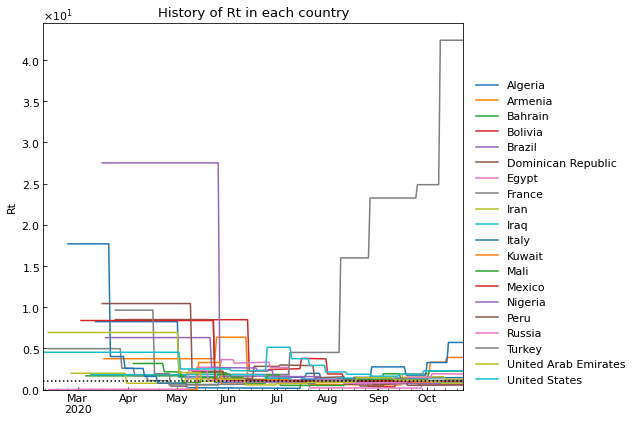

Country,Algeria,Armenia,Bahrain,Bolivia,Brazil,Dominican Republic,Egypt,France,Iran,Iraq,Italy,Kuwait,Mali,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,
2020-10-19,1.47,3.91,0.83,0.54,0.95,0.8,0.56,42.39,1.27,0.88,5.73,1.08,2.25,1.08,0.8,0.61,1.9,1.14,0.79,2.29
2020-10-20,1.47,3.91,0.83,0.54,0.95,0.8,0.56,42.39,1.27,0.88,5.73,1.08,2.25,1.08,0.8,0.61,1.9,1.14,0.79,2.29
2020-10-21,1.47,3.91,0.83,0.54,0.95,0.8,0.56,42.39,1.27,0.88,5.73,1.08,2.25,1.08,0.8,0.61,1.9,1.14,0.79,2.29
2020-10-22,1.47,3.91,0.83,0.54,0.95,0.8,0.56,42.39,1.27,0.88,5.73,1.08,2.25,1.08,0.8,0.61,1.9,1.14,0.79,2.29
2020-10-23,1.47,3.91,0.83,0.54,0.95,0.8,0.56,42.39,1.27,0.88,5.73,1.08,2.25,1.08,0.8,0.61,1.9,1.14,0.79,2.29


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

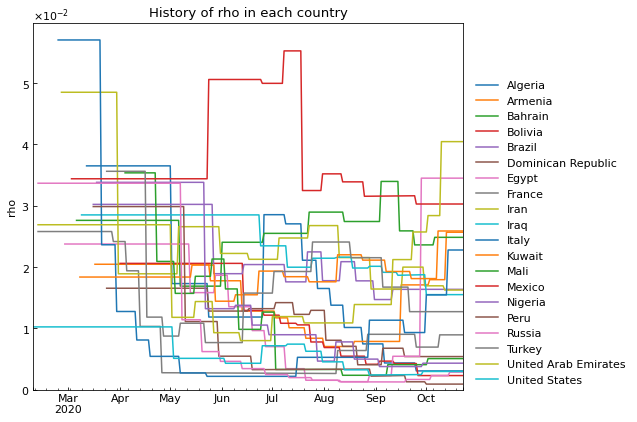

Country,Algeria,Armenia,Bahrain,Bolivia,Brazil,Dominican Republic,Egypt,France,Iran,Iraq,Italy,Kuwait,Mali,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.003063,0.025669,0.024839,0.002304,0.01636,0.005403,0.034486,0.008942,0.01625,0.015498,0.022773,0.025873,0.005069,0.030271,0.004322,0.000913,0.002872,0.012722,0.040439,0.002973
2020-10-20,0.003063,0.025669,0.024839,0.002304,0.01636,0.005403,0.034486,0.008942,0.01625,0.015498,0.022773,0.025873,0.005069,0.030271,0.004322,0.000913,0.002872,0.012722,0.040439,0.002973
2020-10-21,0.003063,0.025669,0.024839,0.002304,0.01636,0.005403,0.034486,0.008942,0.01625,0.015498,0.022773,0.025873,0.005069,0.030271,0.004322,0.000913,0.002872,0.012722,0.040439,0.002973
2020-10-22,0.003063,0.025669,0.024839,0.002304,0.01636,0.005403,0.034486,0.008942,0.01625,0.015498,0.022773,0.025873,0.005069,0.030271,0.004322,0.000913,0.002872,0.012722,0.040439,0.002973
2020-10-23,0.003063,0.025669,0.024839,0.002304,0.01636,0.005403,0.034486,0.008942,0.01625,0.015498,0.022773,0.025873,0.005069,0.030271,0.004322,0.000913,0.002872,0.012722,0.040439,0.002973


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

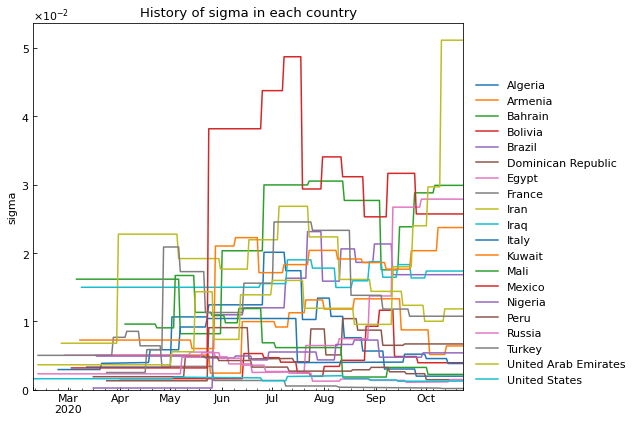

Country,Algeria,Armenia,Bahrain,Bolivia,Brazil,Dominican Republic,Egypt,France,Iran,Iraq,Italy,Kuwait,Mali,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.00198,0.006401,0.029879,0.00394,0.016818,0.006691,0.027865,0.000174,0.011815,0.017351,0.003827,0.02371,0.00224,0.0257,0.005387,0.001466,0.001471,0.010744,0.051108,0.001258
2020-10-20,0.00198,0.006401,0.029879,0.00394,0.016818,0.006691,0.027865,0.000174,0.011815,0.017351,0.003827,0.02371,0.00224,0.0257,0.005387,0.001466,0.001471,0.010744,0.051108,0.001258
2020-10-21,0.00198,0.006401,0.029879,0.00394,0.016818,0.006691,0.027865,0.000174,0.011815,0.017351,0.003827,0.02371,0.00224,0.0257,0.005387,0.001466,0.001471,0.010744,0.051108,0.001258
2020-10-22,0.00198,0.006401,0.029879,0.00394,0.016818,0.006691,0.027865,0.000174,0.011815,0.017351,0.003827,0.02371,0.00224,0.0257,0.005387,0.001466,0.001471,0.010744,0.051108,0.001258
2020-10-23,0.00198,0.006401,0.029879,0.00394,0.016818,0.006691,0.027865,0.000174,0.011815,0.017351,0.003827,0.02371,0.00224,0.0257,0.005387,0.001466,0.001471,0.010744,0.051108,0.001258


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

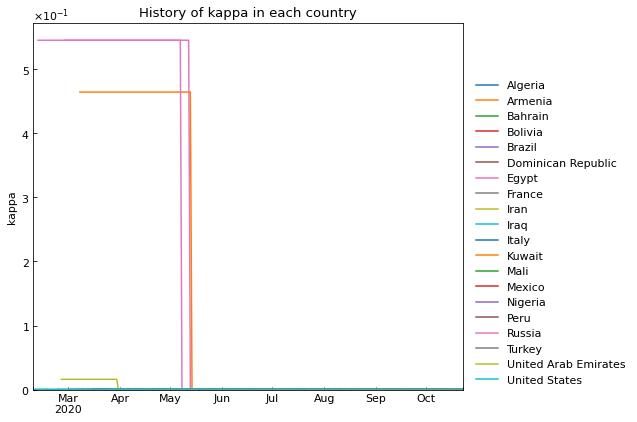

Country,Algeria,Armenia,Bahrain,Bolivia,Brazil,Dominican Republic,Egypt,France,Iran,Iraq,Italy,Kuwait,Mali,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.000048,0.000162,0.000172,0.000036,0.000092,0.000071,0.000024,0.000037,0.000914,0.000002,0.000148,0.000172,0.000008,0.000388,0.000021,0.00001,0.000041,0.000109,0.000079,0.000037
2020-10-20,0.000048,0.000162,0.000172,0.000036,0.000092,0.000071,0.000024,0.000037,0.000914,0.000002,0.000148,0.000172,0.000008,0.000388,0.000021,0.00001,0.000041,0.000109,0.000079,0.000037
2020-10-21,0.000048,0.000162,0.000172,0.000036,0.000092,0.000071,0.000024,0.000037,0.000914,0.000002,0.000148,0.000172,0.000008,0.000388,0.000021,0.00001,0.000041,0.000109,0.000079,0.000037
2020-10-22,0.000048,0.000162,0.000172,0.000036,0.000092,0.000071,0.000024,0.000037,0.000914,0.000002,0.000148,0.000172,0.000008,0.000388,0.000021,0.00001,0.000041,0.000109,0.000079,0.000037
2020-10-23,0.000048,0.000162,0.000172,0.000036,0.000092,0.000071,0.000024,0.000037,0.000914,0.000002,0.000148,0.000172,0.000008,0.000388,0.000021,0.00001,0.000041,0.000109,0.000079,0.000037


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

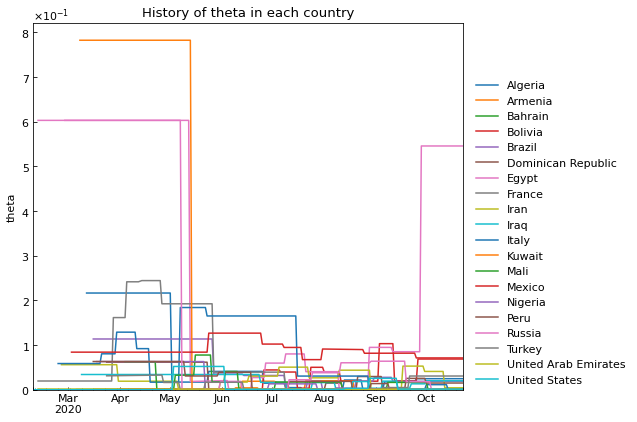

Country,Algeria,Armenia,Bahrain,Bolivia,Brazil,Dominican Republic,Egypt,France,Iran,Iraq,Italy,Kuwait,Mali,Mexico,Nigeria,Peru,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.024646,0.001122,0.001356,0.068615,0.018794,0.000931,0.545448,0.000673,0.004245,0.020028,0.000532,0.001354,0.001185,0.071104,0.000692,0.014947,0.000019,0.030618,0.000755,0.001273
2020-10-20,0.024646,0.001122,0.001356,0.068615,0.018794,0.000931,0.545448,0.000673,0.004245,0.020028,0.000532,0.001354,0.001185,0.071104,0.000692,0.014947,0.000019,0.030618,0.000755,0.001273
2020-10-21,0.024646,0.001122,0.001356,0.068615,0.018794,0.000931,0.545448,0.000673,0.004245,0.020028,0.000532,0.001354,0.001185,0.071104,0.000692,0.014947,0.000019,0.030618,0.000755,0.001273
2020-10-22,0.024646,0.001122,0.001356,0.068615,0.018794,0.000931,0.545448,0.000673,0.004245,0.020028,0.000532,0.001354,0.001185,0.071104,0.000692,0.014947,0.000019,0.030618,0.000755,0.001273
2020-10-23,0.024646,0.001122,0.001356,0.068615,0.018794,0.000931,0.545448,0.000673,0.004245,0.020028,0.000532,0.001354,0.001185,0.071104,0.000692,0.014947,0.000019,0.030618,0.000755,0.001273


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57236 entries, 0 to 57501
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 57236 non-null  datetime64[ns]
 1   Country                              57236 non-null  object        
 2   Rt                                   57236 non-null  float64       
 3   theta                                57236 non-null  float64       
 4   kappa                                57236 non-null  float64       
 5   rho                                  57236 non-null  float64       
 6   sigma                                57236 non-null  float64       
 7   School_closing                       57236 non-null  int64         
 8   Workplace_closing                    57236 non-null  int64         
 9   Cancel_events                        57236 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.242362,-0.220231,0.113823,-0.185829,-0.111329,0.087051,-0.166027,0.084783,-0.136999,-0.112537,-0.061269,-0.090050,0.030355,-0.035810,-0.100623,-0.041091
theta,-0.242362,1.000000,0.972421,0.709108,-0.011893,-0.183124,-0.098970,-0.238467,-0.197673,-0.193000,0.184582,0.013288,0.146369,-0.322489,-0.289040,-0.010176,-0.082425
kappa,-0.220231,0.972421,1.000000,0.713925,-0.081667,-0.215126,-0.142008,-0.273341,-0.187679,-0.190540,0.180288,0.018378,0.168964,-0.352105,-0.243907,-0.023116,-0.118430
rho,0.113823,0.709108,0.713925,1.000000,0.172693,-0.159476,-0.078066,-0.301582,-0.149599,-0.174014,0.201092,0.022946,0.031419,-0.365129,-0.435359,-0.209738,-0.062983
sigma,-0.185829,-0.011893,-0.081667,0.172693,1.000000,0.144200,-0.021114,0.064712,-0.065316,0.063887,0.045200,-0.009401,-0.098812,0.029705,-0.193953,0.052951,0.096310
School_closing,-0.111329,-0.183124,-0.215126,-0.159476,0.144200,1.000000,0.697110,0.763785,0.614035,0.576266,0.590634,0.570086,0.468252,0.674163,0.399521,0.263194,0.812018
Workplace_closing,0.087051,-0.098970,-0.142008,-0.078066,-0.021114,0.697110,1.000000,0.722221,0.671864,0.496545,0.616755,0.544241,0.481592,0.773777,0.440964,0.317498,0.818775
Cancel_events,-0.166027,-0.238467,-0.273341,-0.301582,0.064712,0.763785,0.722221,1.000000,0.635955,0.449877,0.496523,0.484772,0.533768,0.853825,0.557200,0.559285,0.783631
Gatherings_restrictions,0.084783,-0.197673,-0.187679,-0.149599,-0.065316,0.614035,0.671864,0.635955,1.000000,0.672563,0.643698,0.708787,0.546027,0.686445,0.440075,0.277635,0.832095
Transport_closing,-0.136999,-0.193000,-0.190540,-0.174014,0.063887,0.576266,0.496545,0.449877,0.672563,1.000000,0.608331,0.710674,0.490012,0.422568,0.184076,0.085849,0.762414


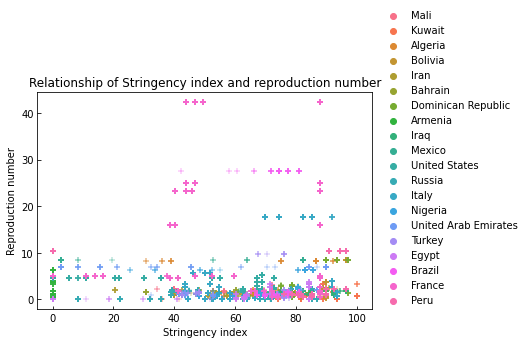

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()